In [1]:
import rosbag
from geometry_msgs.msg import PoseWithCovariance
import numpy as np
# import pandas as pd
TOPICS = ['/current_pose', '/dji_osdk_ros/height_above_takeoff']
takeoff = False
messages = []
poses = []
path = "../calibrate/odom-test.bag"
bag = rosbag.Bag(path)
for topic, msg, t in bag.read_messages(TOPICS):
    if topic == '/dji_osdk_ros/height_above_takeoff' and takeoff == False:
        if msg.data > 2:
            takeoff = True
    if topic == "/current_pose" and takeoff == True:
        messages.append(msg.pose)
        poses.append([msg.pose.pose.position.x, msg.pose.pose.position.y])

data = np.asarray(poses)


(919, 2)


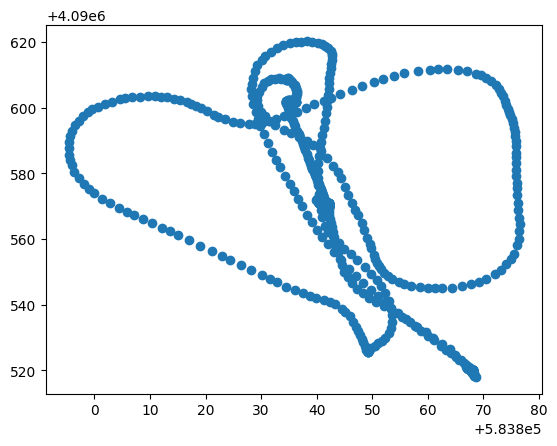

In [3]:
import matplotlib.pyplot as plt
print(data.shape)
plt.scatter(data[:,0], data[:,1])

In [10]:
print("absolute drift (m):", abs(data[0] - data[data.shape[0]-1]))

absolute drift (m): [0.14870916 0.06873147]


In [24]:
distance = 0
for i in range(0,data.shape[0]-2):
    d = abs(np.linalg.norm(data[i] - data[i+1]))
    # print(d)
    distance += d

print(distance)

682.4439588989059
